##Machine Translation Using a Seq2Seq Architecture
© 2023, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [1]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Bidirectional, LSTM, Embedding
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207 

## Getting the data

In [2]:
#Test Your Zaka
# Clone the GitHub repository
!git clone https://github.com/zaka-ai/machine_learning_certification.git

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (43/43), 43.23 MiB | 4.12 MiB/s, done.
Updating files: 100% (15/15), done.


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [3]:
#Test Your Zaka (English)
english = pd.read_csv('machine_learning_certification/Challenge 7/en.csv', header=None)

In [6]:
#Test Your Zaka (French)
french = pd.read_csv('machine_learning_certification/Challenge 7/fr.csv', header=None)

**How many sentences does each of the files contain?**

In [7]:
#Test Your Zaka
en_sentences = len(english)
fr_sentences = len(french)

print("Number of English sentences:", en_sentences)
print("Number of French sentences:", fr_sentences)

Number of English sentences: 137860
Number of French sentences: 137860


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [8]:
#Test Your Zaka
# Concatenate the English and French dataframes into a single dataframe called "df"
df = pd.concat([english, french], axis=1)

# Display the first few rows of the new dataframe
df.head()

,0,0
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Let's name the columns as **English** and **French** so that we access them easier.

In [10]:
#Test Your Zaka
df.columns = ['English', 'French']
df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [11]:
#Test Your Zaka
import random

# Select a random sentence index
idx = random.randint(0, len(df)-1)
# Print the corresponding English and French sentences
print('English Sentence: {}\n'.format(df['English'][idx]))
print('French Sentence: {}\n'.format(df['French'][idx]))

English Sentence: she likes pears , grapefruit , and grapes .

French Sentence: elle aime les poires , les pamplemousses et les raisins .



##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [12]:
#Test Your Zaka
import string

def remove_punctuations(sentence):
    # Create a string with all the punctuations to remove
    punctuations = string.punctuation
    # Create a translation table to remove the punctuations from the sentence
    translator = str.maketrans('', '', punctuations)
    # Remove the punctuations from the sentence using the translation table
    sentence = sentence.translate(translator)
    return sentence
df['english'] = df['English'].apply(remove_punctuations)
df['french'] = df['French'].apply(remove_punctuations)

Make sure that the punctuation is removed by printing the example that you printed earlier.

In [13]:
#Test Your Zaka
print("Original English sentence: ", df['English'][idx]+'\n')
print("Cleaned English sentence: ", remove_punctuations(df['English'][idx] +'\n'))

print("Original French sentence: ", df['French'][idx]+'\n')
print("Cleaned French sentence: ", remove_punctuations(df['French'][idx]),'\n')

Original English sentence:  she likes pears , grapefruit , and grapes .

Cleaned English sentence:  she likes pears  grapefruit  and grapes 

Original French sentence:  elle aime les poires , les pamplemousses et les raisins .

Cleaned French sentence:  elle aime les poires  les pamplemousses et les raisins  



##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [14]:
#Test Your Zaka
# Add columns for ENG Length and FR Length
df['ENG Length'] = df['english'].apply(lambda x: len(x.split()))

In [15]:
#Test Your Zaka
# Add columns for ENG Length and FR Length
df['FR Length'] = df['french'].apply(lambda x: len(x.split()))

In [16]:
df.head()

,English,French,english,french,ENG Length,FR Length
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l automne...,13,14
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15,13
2,"california is usually quiet during march , and...","california est généralement calme en mars , et...",california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et...",the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,14,13
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo...",your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

In [17]:
#Test Your Zaka
import matplotlib.pyplot as plt

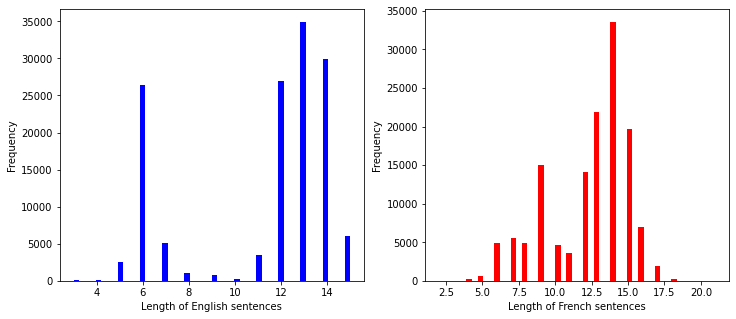

In [18]:
#Test Your Zaka
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of English sentence lengths
axs[0].hist(df['ENG Length'], bins=50, color='blue')
axs[0].set_xlabel('Length of English sentences')
axs[0].set_ylabel('Frequency')

# Plot the distribution of French sentence lengths
axs[1].hist(df['FR Length'], bins=50, color='red')
axs[1].set_xlabel('Length of French sentences')
axs[1].set_ylabel('Frequency')
# Show the plot
plt.show()

Get the maximum length of an english sentence and the maximum length of a french sentence. 

In [19]:
#Test Your Zaka
max_eng_length = df['ENG Length'].max()
max_fr_length = df['FR Length'].max()
print("Maximum length of an English sentence:", max_eng_length)
print("Maximum length of an french sentence:", max_fr_length)

Maximum length of an English sentence: 15
Maximum length of an french sentence: 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded. 

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

[Share Your Zaka]

Tokenize the sentences that we have.

In [20]:
#Test Your Zaka
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the English sentences
eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(df['english'])
eng_sequences = eng_tokenizer.texts_to_sequences(df['english'])

# Tokenize the French sentences
fr_tokenizer = Tokenizer()
fr_tokenizer.fit_on_texts(df['french'])
fr_sequences = fr_tokenizer.texts_to_sequences(df['french'])


**How many unique words do we have in english and in french?**

In [21]:
#Test Your Zaka
# Find the number of unique words in the English sentences
num_eng_words = len(eng_tokenizer.word_index)+1
print("Number of unique words in English sentences:", num_eng_words)

# Find the number of unique words in the French sentences
num_fr_words = len(fr_tokenizer.word_index)+1
print("Number of unique words in French sentences:", num_fr_words)


Number of unique words in English sentences: 200
Number of unique words in French sentences: 345


####Padding

**What should be the length of the sequences that we have after padding?**

[Share your Zaka]

Perform padding on the sequences that we have.

In [22]:
#Test Your Zaka
# Pad the English sequences
padded_eng_sequences = pad_sequences(eng_sequences, maxlen=max_eng_length, padding='post')
# Pad the French sequences
padded_fr_sequences = pad_sequences(fr_sequences, maxlen=None, padding='post')

In [23]:
# Print the padded sequences
print("Padded English sequence:\n", padded_eng_sequences[0])
print("Padded French sequence:\n", padded_fr_sequences[0])

Padded English sequence:
 [17 23  1  8 67  4 39  7  3  1 55  2 44  0  0]
Padded French sequence:
 [ 34  33   1   8  66  36  11  24   6   3   1 111   2  49   0   0   0   0
   0   0   0]


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [24]:
#Test Your Zaka
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, TimeDistributed
from tensorflow.keras.utils import to_categorical


# Define the model
model = Sequential()

# Add an embedding layer to convert the input sequences into dense vectors of fixed size
model.add(Embedding(num_eng_words + 1, 128, input_length=max_eng_length))

# Add a one-directional LSTM layer with 256 units
model.add(LSTM(256, return_sequences=True))

# Add another one-directional LSTM layer with 128 units
model.add(LSTM(128, return_sequences=True))

# Add a dense output layer with softmax activation to output the predicted probabilities for each class
model.add(Dense(units=num_fr_words, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 128)           25728     
                                                                 
 lstm (LSTM)                 (None, 15, 256)           394240    
                                                                 
 lstm_1 (LSTM)               (None, 15, 128)           197120    
                                                                 
 dense (Dense)               (None, 15, 345)           44505     
                                                                 
Total params: 661,593
Trainable params: 661,593
Non-trainable params: 0
_________________________________________________________________


Compile and train the model. 
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [22]:
#Test Your Zaka
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
from sklearn.model_selection import train_test_split
# Pad the French sequences to match the length of the English sequences
padded_fr_sequences = pad_sequences(fr_sequences, maxlen=max_eng_length, padding='post')

# Split the data into training and validation sets
train_eng, val_eng, train_fr, val_fr = train_test_split(padded_eng_sequences, padded_fr_sequences, test_size=0.2, random_state=42)

# Train the model using the training data and validate using the validation data
model.fit(train_eng, to_categorical(train_fr, num_fr_words), batch_size=256, epochs=50, validation_data=(val_eng, to_categorical(val_fr, num_fr_words)))



Epoch 1/50
431/431 [==============================] - 24s 34ms/step - loss: 2.8915 - accuracy: 0.3636 - val_loss: 1.9478 - val_accuracy: 0.4982
Epoch 2/50
431/431 [==============================] - 7s 16ms/step - loss: 1.6122 - accuracy: 0.5638 - val_loss: 1.3750 - val_accuracy: 0.6205
Epoch 3/50
431/431 [==============================] - 6s 15ms/step - loss: 1.2099 - accuracy: 0.6650 - val_loss: 1.0553 - val_accuracy: 0.7091
Epoch 4/50
431/431 [==============================] - 6s 15ms/step - loss: 0.9449 - accuracy: 0.7421 - val_loss: 0.8433 - val_accuracy: 0.7669
Epoch 5/50
431/431 [==============================] - 6s 15ms/step - loss: 0.7656 - accuracy: 0.7874 - val_loss: 0.7008 - val_accuracy: 0.8015
Epoch 6/50
431/431 [==============================] - 6s 14ms/step - loss: 0.6648 - accuracy: 0.8087 - val_loss: 0.6234 - val_accuracy: 0.8172
Epoch 7/50
431/431 [==============================] - 6s 15ms/step - loss: 0.6093 - accuracy: 0.8194 - val_loss: 0.6088 - val_accuracy: 0.817

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [23]:
#Test Your Zaka
def translate_to_french(input_sentence):
    # Convert the input sentence to a sequence of integers using the English tokenizer
    input_seq = eng_tokenizer.texts_to_sequences([input_sentence])[0]
    # Pad the input sequence
    input_padded = pad_sequences([input_seq], maxlen=max_eng_length, padding='post')
    # Use the trained model to generate the output sequence
    output_seq = model.predict(input_padded)[0]
    # Convert the output sequence to a sequence of integers
    output_seq = np.argmax(output_seq, axis=-1)
    # Convert the output sequence to a sentence using the French tokenizer
    output_sentence = fr_tokenizer.sequences_to_texts([output_seq])[0]
    # Remove the padding token from the output sentence
    output_sentence = output_sentence.replace('<pad>', '').strip()
    return output_sentence

Test the following sentence

In [39]:
input = "she is driving the truck"

#Test Your Zaka
predicted_french_sentence = translate_to_french(input)
print(input + ' : \n' +predicted_french_sentence)  

1/1 [==============================] - 0s 24ms/step
she is driving the truck : 
elle conduit cette voiture jaune


In [31]:
#GRU 
from keras.layers import GRU
# Define the model
model_1 = Sequential()

# Add an embedding layer to convert the input sequences into dense vectors of fixed size
model_1.add(Embedding(num_eng_words + 1, 512, input_length=max_eng_length))

# Add a one-directional GRU layer with 128 units
model_1.add(GRU(256, return_sequences=True))

# Add a dense output layer with softmax activation to output the predicted probabilities for each class
model_1.add(Dense(num_fr_words, activation='softmax'))
# Compile the model with categorical cross-entropy loss and Adam optimizer
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_1.summary()
# Pad the French sequences to match the length of the English sequences
padded_fr_sequences = pad_sequences(fr_sequences, maxlen=max_eng_length, padding='post')

# Split the data into training and validation sets
train_eng, val_eng, train_fr, val_fr = train_test_split(padded_eng_sequences, padded_fr_sequences, test_size=0.2, random_state=42)

# Train the model using the training data and validate using the validation data
model_1.fit(train_eng, to_categorical(train_fr, num_fr_words), batch_size=128, epochs=50, validation_data=(val_eng, to_categorical(val_fr, num_fr_words)))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 512)           102912    
                                                                 
 gru (GRU)                   (None, 15, 256)           591360    
                                                                 
 dense_2 (Dense)             (None, 15, 345)           88665     
                                                                 
Total params: 782,937
Trainable params: 782,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
862/862 [==============================] - 35s 37ms/step - loss: 1.2225 - accuracy: 0.6889 - val_loss: 0.6396 - val_accuracy: 0.8047
Epoch 2/50
862/862 [==============================] - 10s 11ms/step - loss: 0.5797 - accuracy: 0.8196 - val_loss: 0.5300 - val_accuracy: 0.8344
Epoch 3/50
862/862 [====

In [32]:
def translate_to_french_1(input_sentence):
    # Convert the input sentence to a sequence of integers using the English tokenizer
    input_seq = eng_tokenizer.texts_to_sequences([input_sentence])[0]
    # Pad the input sequence
    input_padded = pad_sequences([input_seq], maxlen=max_eng_length, padding='post')
    # Use the trained model to generate the output sequence
    output_seq = model_1.predict(input_padded)[0]
    # Convert the output sequence to a sequence of integers
    output_seq = np.argmax(output_seq, axis=-1)
    # Convert the output sequence to a sentence using the French tokenizer
    output_sentence = fr_tokenizer.sequences_to_texts([output_seq])[0]
    # Remove the padding token from the output sentence
    output_sentence = output_sentence.replace('<pad>', '').strip()
    return output_sentence

In [33]:
input = "she is driving the truck"

#Test Your Zaka
predicted_french_sentence = translate_to_french_1(input)
print(input + ' : \n' +predicted_french_sentence)  

1/1 [==============================] - 0s 399ms/step
she is driving the truck : 
elle conduit la nouveau


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [25]:
#Test Your Zaka
from keras.layers import Bidirectional

# Define the model
model_2 = Sequential()

# Add an embedding layer to convert the input sequences into dense vectors of fixed size
model_2.add(Embedding(num_eng_words + 1, 128, input_length=max_eng_length))

# Add a bidirectional LSTM layer with 256 units
model_2.add(Bidirectional(LSTM(256, return_sequences=True)))

# Add another bidirectional LSTM layer with 128 units
model_2.add(Bidirectional(LSTM(128, return_sequences=True)))

# Add a dense output layer with softmax activation to output the predicted probabilities for each class
model_2.add(Dense(units=num_fr_words, activation='softmax'))

# Print the model summary
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 128)           25728     
                                                                 
 bidirectional (Bidirectiona  (None, 15, 512)          788480    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 15, 256)          656384    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 15, 345)           88665     
                                                                 
Total params: 1,559,257
Trainable params: 1,559,257
Non-trainable params: 0
_________________________________________________________________


compile and train your new model.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Test Your Zaka
# Compile the model with categorical cross-entropy loss and Adam optimizer
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Pad the French sequences to match the length of the English sequences
padded_fr_sequences = pad_sequences(fr_sequences, maxlen=max_eng_length, padding='post')

# Split the data into training and validation sets
train_eng, val_eng, train_fr, val_fr = train_test_split(padded_eng_sequences, padded_fr_sequences, test_size=0.2, random_state=42)

# Train the model using the training data and validate using the validation data
model_2.fit(train_eng, to_categorical(train_fr, num_fr_words), batch_size=128, epochs=50, validation_data=(val_eng, to_categorical(val_fr, num_fr_words)))

Epoch 1/50
862/862 [==============================] - 40s 29ms/step - loss: 1.8772 - accuracy: 0.5237 - val_loss: 1.1650 - val_accuracy: 0.6667
Epoch 2/50
862/862 [==============================] - 15s 18ms/step - loss: 0.8331 - accuracy: 0.7613 - val_loss: 0.5473 - val_accuracy: 0.8453
Epoch 3/50
862/862 [==============================] - 16s 18ms/step - loss: 0.4304 - accuracy: 0.8736 - val_loss: 0.3309 - val_accuracy: 0.8992
Epoch 4/50
862/862 [==============================] - 15s 18ms/step - loss: 0.2942 - accuracy: 0.9093 - val_loss: 0.2533 - val_accuracy: 0.9210
Epoch 5/50
862/862 [==============================] - 14s 17ms/step - loss: 0.2224 - accuracy: 0.9310 - val_loss: 0.1985 - val_accuracy: 0.9388
Epoch 6/50
862/862 [==============================] - 15s 18ms/step - loss: 0.1767 - accuracy: 0.9451 - val_loss: 0.1762 - val_accuracy: 0.9453
Epoch 7/50
862/862 [==============================] - 15s 18ms/step - loss: 0.1441 - accuracy: 0.9554 - val_loss: 0.1493 - val_accuracy:

Define a new function that relies on your new model to make predictions.

In [28]:
#Test Your Zaka
def translate_to_french_2(input_sentence):
    # Convert the input sentence to a sequence of integers using the English tokenizer
    input_seq = eng_tokenizer.texts_to_sequences([input_sentence])[0]
    # Pad the input sequence
    input_padded = pad_sequences([input_seq], maxlen=max_eng_length, padding='post')
    # Use the trained model to generate the output sequence
    output_seq = model_2.predict(input_padded)[0]
    # Convert the output sequence to a sequence of integers
    output_seq = np.argmax(output_seq, axis=-1)
    # Convert the output sequence to a sentence using the French tokenizer
    output_sentence = fr_tokenizer.sequences_to_texts([output_seq])[0]
    # Remove the padding token and any other unwanted characters from the output sentence
    output_sentence = output_sentence.replace('<pad>', '').replace(' <eos>', '').strip()
    return output_sentence


In [30]:
input = "she is driving the truck"

#Test Your Zaka
predicted_french_sentence = translate_to_french_2(input)
print(input + ' : \n' +predicted_french_sentence)  

1/1 [==============================] - 0s 24ms/step
she is driving the truck : 
elle conduit le nouveau camion


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

[Share Your Zaka]

**What are some additional ways that we can do to improve the performance of our model?**

[Share Your Zaka]